## Societal Acceptance of the LGBTQ+ Community: A Demographic and Attitudinal Analysis


In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

print("Packages imported successfully")

Packages imported successfully


## Data Import

In [ ]:
data = pd.read_excel("/Users/mari/Desktop/Github/societalacceptanceoflgbtqcommunity/societal_acceptance.xlsx")
df = pd.DataFrame(data)
print(df.head())

                                  #  \
0  ztfw5stwq4m3xtztfyewlpxbl6frb80s   
1  rzna89fakp14yfqrwyd7vdrzna89fs0i   
2  66rxhe42rn2tv966rxhtghua7iyc0li3   
3  f4xo4trvwusznv04fu8f4x1nd9hmpiqa   
4  kjesldgd5gvzfwdg54u8r6kjeslm7i43   

  How old are you? Please see the appropriate age range.  \
0                                              45-54       
1                                              35-44       
2                                              25-34       
3                                              25-34       
4                                              25-34       

  How would you describe your ethnicity?    How do you identify?  \
0              Black or African-American                  Female   
1                                  Asian                    Male   
2                                  White  Prefer not to disclose   
3                                  White                    Male   
4              Black or African-American                    Male

## Data Preprocessing

In [ ]:
# Rename the column headers
df.rename(columns = {'How old are you? Please see the appropriate age range.': 'Age Range', 
                     'How would you describe your ethnicity?': 'Ethnicity', 
                     'How would you describe your sexual orientation?': 'Sexual Orientation',
                     'What is the highest level of school you have completed or the highest degree you have received?': 'Education Level', 
                     'Do you identify with any of the following religions?': 'Religious Beliefs', 
                     'How would you describe your political viewpoints?': 'Political Viewpoint', 
                     'Do you identify as a member of the LGBTQ+ community?': 'LGBTQ?', 
                     'How frequently do you interact with members of the LGBTQ+ community?': 'Frequency of LGBTQ interaction', 
                     'On a scale of 1-10, how would you rate your overall understanding of LGBTQ+ issues?': 'Overall Understanding of LGBTQ Issues',  
                     'What is your primary source of information about LGBTQ+ issues? (Please choose the best option from this list)': 'Primary Source of LGBTQ Info', 
                     'On a scale of 1-10, how important do you believe it is to educate the public about LGBTQ+ issues?': 'Public Education of LGBTQ Issues Rating', 
                     'On a scale of 1-10, how would you rate your overall acceptance of the LGBTQ+ community?': 'Overall Acceptance Rating', 
                     'Do you believe that LGBTQ+ individuals should have the same rights as non-LGBTQ+ individuals?': 'Equality Rating',  
                     'Have your views on the LGBTQ+ community changed over the last few years?': 'Views Have Changed',
                     'How would you react if a friend or family member came out as LGBTQ+?': 'Reaction of Coming Out', 
                     'Do you know anyone personally who identifies as LGBTQ+?': 'Knows Someone Who Is LGBTQ'}, inplace = True) 

In [ ]:
# Check only the columns that have Na/NaN values in them (verification)
null_rows = df[df.isna().any(axis = 1)]
display(null_rows)

,#,Age Range,Ethnicity,How do you identify?,Sexual Orientation,Other,Education Level,Religious Beliefs,Other.1,Political Viewpoint,LGBTQ?,Knows Someone Who Is LGBTQ,Frequency of LGBTQ interaction,Overall Understanding of LGBTQ Issues,Primary Source of LGBTQ Info,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating,Equality Rating,Views Have Changed,Reaction of Coming Out
0,ztfw5stwq4m3xtztfyewlpxbl6frb80s,45-54,Black or African-American,Female,Straight,NaN,Some college but no degree,Christianity,NaN,Moderate,0,1,Daily,6,Personal experiences or encounters,8,10,1,1,I would support and accept them unconditionally.
1,rzna89fakp14yfqrwyd7vdrzna89fs0i,35-44,Asian,Male,Straight,NaN,Bachelor degree,Catholicism,NaN,Slightly liberal,1,1,Daily,6,Personal experiences or encounters,9,7,1,1,I would support and accept them unconditionally.
2,66rxhe42rn2tv966rxhtghua7iyc0li3,25-34,White,Prefer not to disclose,Straight,NaN,Bachelor degree,No religion,NaN,Slightly liberal,0,1,Monthly,6,Personal experiences or encounters,6,8,1,0,I would express my love and continue to treat ...
3,f4xo4trvwusznv04fu8f4x1nd9hmpiqa,25-34,White,Male,Straight,NaN,Some college but no degree,No religion,NaN,Slightly liberal,0,1,Weekly,8,Personal experiences or encounters,7,8,1,0,I would express my love and continue to treat ...
4,kjesldgd5gvzfwdg54u8r6kjeslm7i43,25-34,Black or African-American,Male,Straight,NaN,Some college but no degree,Christianity,NaN,Very liberal,0,1,Daily,7,Friends or family members,9,10,1,0,I would support and accept them unconditionally.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,vhlff3u1ghlt5pdkcvhlfbyn8vrwsyy8,25-34,Black or African-American,Female,Bisexual,NaN,Bachelor degree,No religion,NaN,Very liberal,1,1,Daily,7,Personal experiences or encounters,8,10,1,1,I would support and accept them unconditionally.
173,unz902dg8gnwjkgdmu2goeunz902tg0r,25-34,Black or African-American,Female,Straight,NaN,Some college but no degree,No religion,NaN,Very liberal,0,1,Daily,9,Friends or family members,10,10,1,0,I would support and accept them unconditionally.
174,3a4vwosqcb84qsjq8am3a4vwkk6qfu8u,45-54,Black or African-American,Male,Gay,NaN,"Graduate degree (ex. Masters, PhD, M.D)",Christianity,NaN,Moderate,1,1,Daily,9,Non-profit LGBTQ+ organizations,10,10,1,1,I would support and accept them unconditionally.
175,ix3vpthiiaxlfaqy0ix3vpthxnlj795c,18-24,Black or African-American,Transgender,Straight,NaN,Bachelor degree,Christianity,NaN,Slightly liberal,1,1,Daily,9,Personal experiences or encounters,10,10,1,0,I would express my love and continue to treat ...


In [ ]:
# Remove #, two 'other' columns from the dataframe
df.drop(['#', 'Other', 'Other.1'], axis = 1, inplace = True)

In [ ]:
# Replace Na/NaN values in the approriate columns
df['Sexual Orientation'] = df['Sexual Orientation'].replace(np.nan, 'Queer')
df['Religious Beliefs'] = df['Religious Beliefs'].replace(np.nan, 'Other')

In [ ]:
# Check if Na/NaN values were updated in the dataframe
df.isnull().sum()

Age Range                                  0
Ethnicity                                  0
How do you identify?                       0
Sexual Orientation                         0
Education Level                            0
Religious Beliefs                          0
Political Viewpoint                        0
LGBTQ?                                     0
Knows Someone Who Is LGBTQ                 0
Frequency of LGBTQ interaction             0
Overall Understanding of LGBTQ Issues      0
Primary Source of LGBTQ Info               0
Public Education of LGBTQ Issues Rating    0
Overall Acceptance Rating                  0
Equality Rating                            0
Views Have Changed                         0
Reaction of Coming Out                     0
dtype: int64

In [ ]:
# Replace 0, 1 with no, yes in the approriate columns
cols_to_replace = ['LGBTQ?', 'Knows Someone Who Is LGBTQ', 'Equality Rating', 'Views Have Changed']
replace_vals = {0: 'No', 1:'Yes'}
df[cols_to_replace] = df[cols_to_replace].replace(replace_vals)

In [ ]:
df.head()

,Age Range,Ethnicity,How do you identify?,Sexual Orientation,Education Level,Religious Beliefs,Political Viewpoint,LGBTQ?,Knows Someone Who Is LGBTQ,Frequency of LGBTQ interaction,Overall Understanding of LGBTQ Issues,Primary Source of LGBTQ Info,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating,Equality Rating,Views Have Changed,Reaction of Coming Out
0,45-54,Black or African-American,Female,Straight,Some college but no degree,Christianity,Moderate,No,Yes,Daily,6,Personal experiences or encounters,8,10,Yes,Yes,I would support and accept them unconditionally.
1,35-44,Asian,Male,Straight,Bachelor degree,Catholicism,Slightly liberal,Yes,Yes,Daily,6,Personal experiences or encounters,9,7,Yes,Yes,I would support and accept them unconditionally.
2,25-34,White,Prefer not to disclose,Straight,Bachelor degree,No religion,Slightly liberal,No,Yes,Monthly,6,Personal experiences or encounters,6,8,Yes,No,I would express my love and continue to treat ...
3,25-34,White,Male,Straight,Some college but no degree,No religion,Slightly liberal,No,Yes,Weekly,8,Personal experiences or encounters,7,8,Yes,No,I would express my love and continue to treat ...
4,25-34,Black or African-American,Male,Straight,Some college but no degree,Christianity,Very liberal,No,Yes,Daily,7,Friends or family members,9,10,Yes,No,I would support and accept them unconditionally.


## EDA - Exploratory Data Analysis

In [ ]:
# Display the size of the dataframe
df.shape

(177, 17)

In [ ]:
# Examine the column names and data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Age Range                                177 non-null    object
 1   Ethnicity                                177 non-null    object
 2   How do you identify?                     177 non-null    object
 3   Sexual Orientation                       177 non-null    object
 4   Education Level                          177 non-null    object
 5   Religious Beliefs                        177 non-null    object
 6   Political Viewpoint                      177 non-null    object
 7   LGBTQ?                                   177 non-null    object
 8   Knows Someone Who Is LGBTQ               177 non-null    object
 9   Frequency of LGBTQ interaction           177 non-null    object
 10  Overall Understanding of LGBTQ Issues    177 non-null    int64

In [ ]:
# Describe the dataset to get a summary of statistics
df.describe()

,Overall Understanding of LGBTQ Issues,Public Education of LGBTQ Issues Rating,Overall Acceptance Rating
count,177.000000,177.000000,177.000000
mean,7.559322,8.096045,8.423729
std,1.979479,2.492451,2.317449
min,1.000000,1.000000,1.000000
25%,7.000000,7.000000,8.000000
50%,8.000000,9.000000,10.000000
75%,9.000000,10.000000,10.000000
max,10.000000,10.000000,10.000000


In [ ]:
# Check the statistics for the age, ethnicity, education, religion, political beliefs columns
age_desc = df['Age Range'].describe()
eth_desc = df['Ethnicity'].describe()
edu_desc = df['Education Level'].describe()
rel_desc = df['Religious Beliefs'].describe()
political_desc = df['Political Viewpoint'].describe()
print(age_desc, eth_desc, edu_desc, rel_desc, political_desc, sep='\n\n\n\n\n')

count       177
unique        6
top       25-34
freq         75
Name: Age Range, dtype: object




count       177
unique        4
top       White
freq         93
Name: Ethnicity, dtype: object




count                 177
unique                  7
top       Bachelor degree
freq                   75
Name: Education Level, dtype: object




count             177
unique              8
top       No religion
freq               74
Name: Religious Beliefs, dtype: object




count              177
unique               6
top       Very liberal
freq                69
Name: Political Viewpoint, dtype: object


Descriptive Statistics: Use measures of central tendency (mean, median, mode) and dispersion (standard deviation, variance) to summarize the data.

## Educational Impact

- How does exposure to LGBTQ+ education correlate with acceptance levels?
- What is the relationship between educational attainment and understanding of LGBTQ+ issues?

## Demographic Analysis

- What is the demographic distribution of survey respondents across age, gender, education level, and political viewpoint?
- Is there a correlation between demographic factors and levels of LGBTQ+ acceptance?

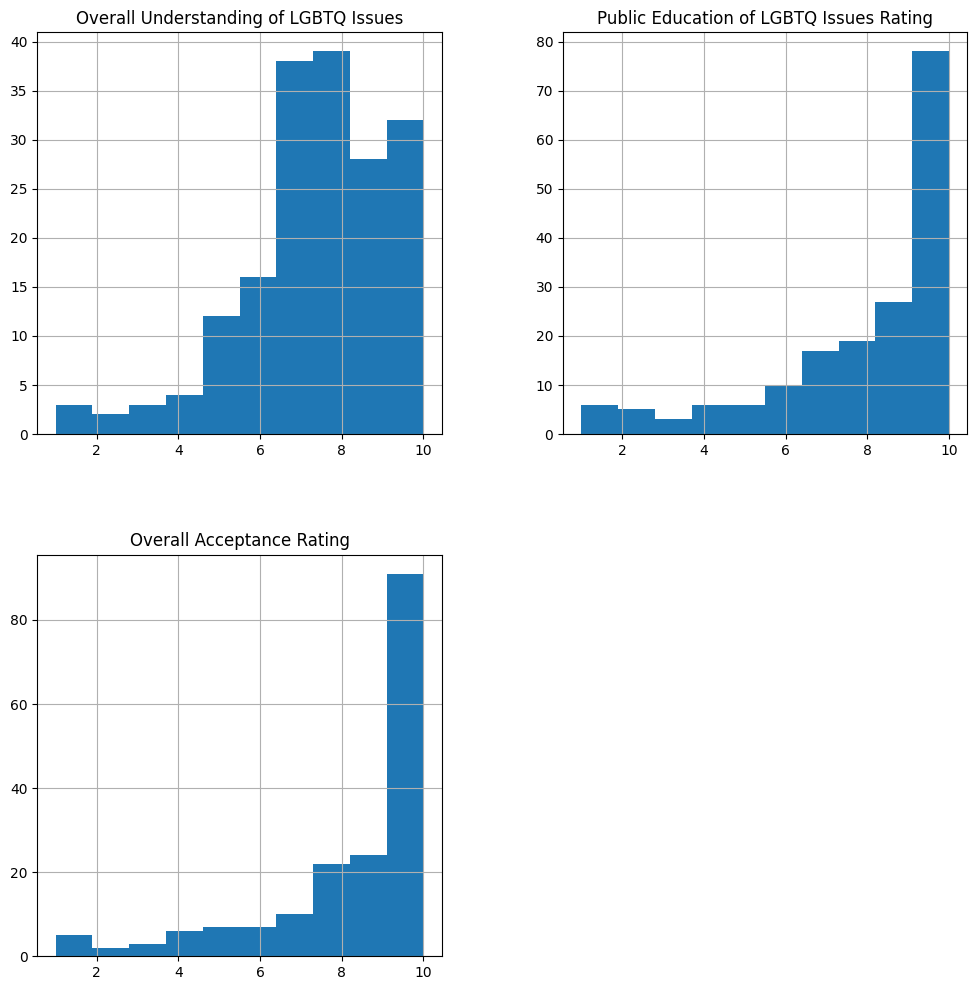

In [ ]:
# EDA of numerical columns
df.hist(figsize=(12,12))
plt.show()

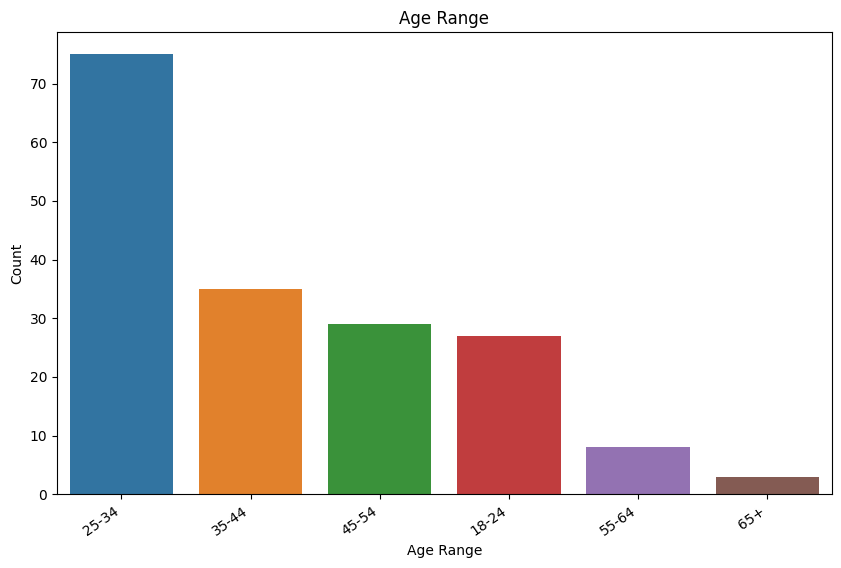

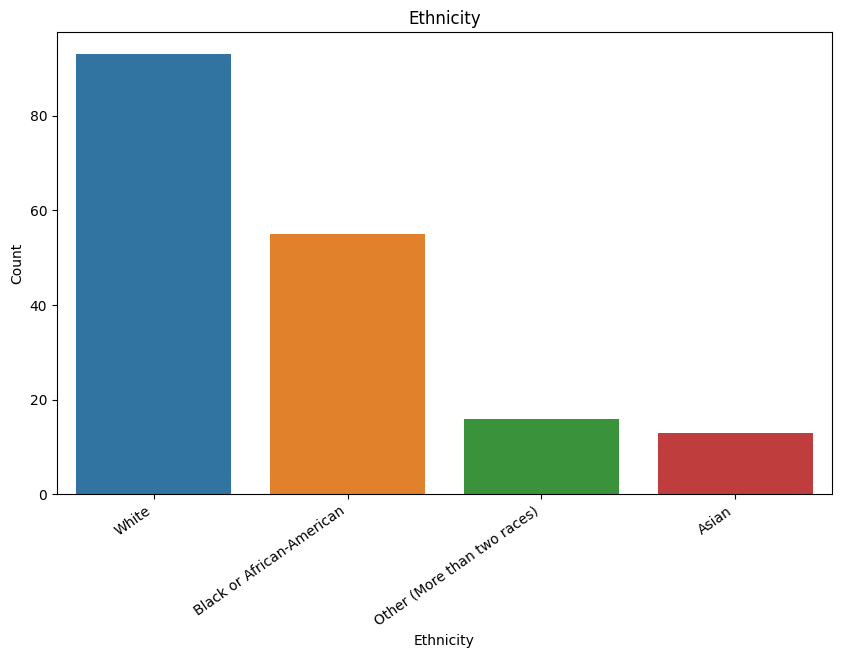

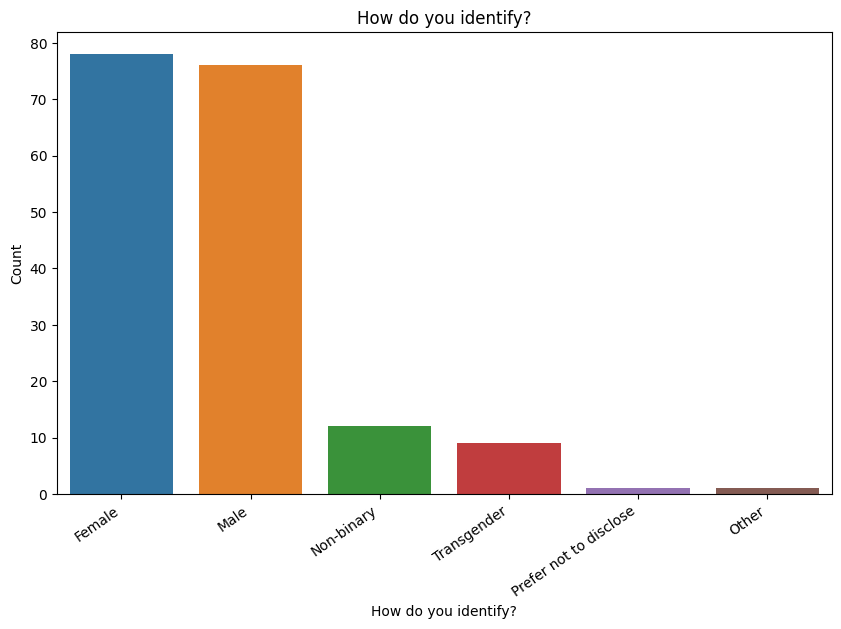

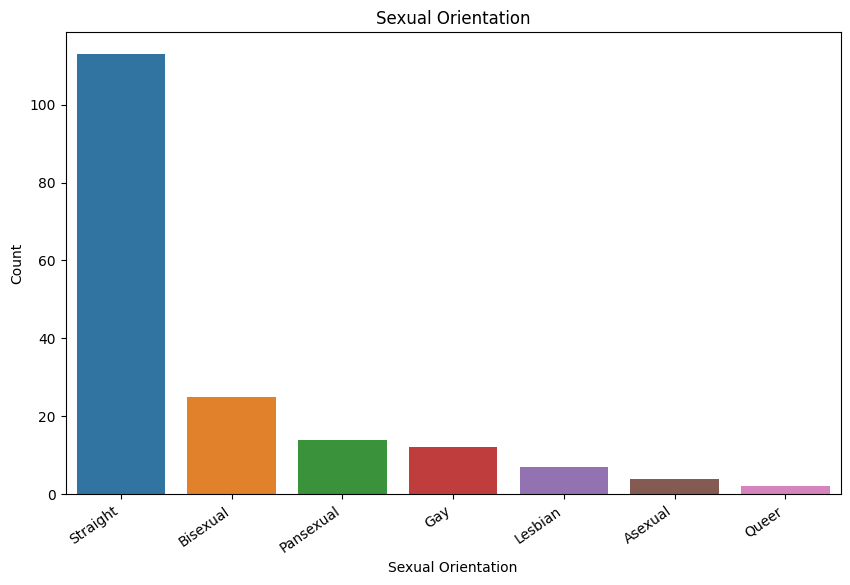

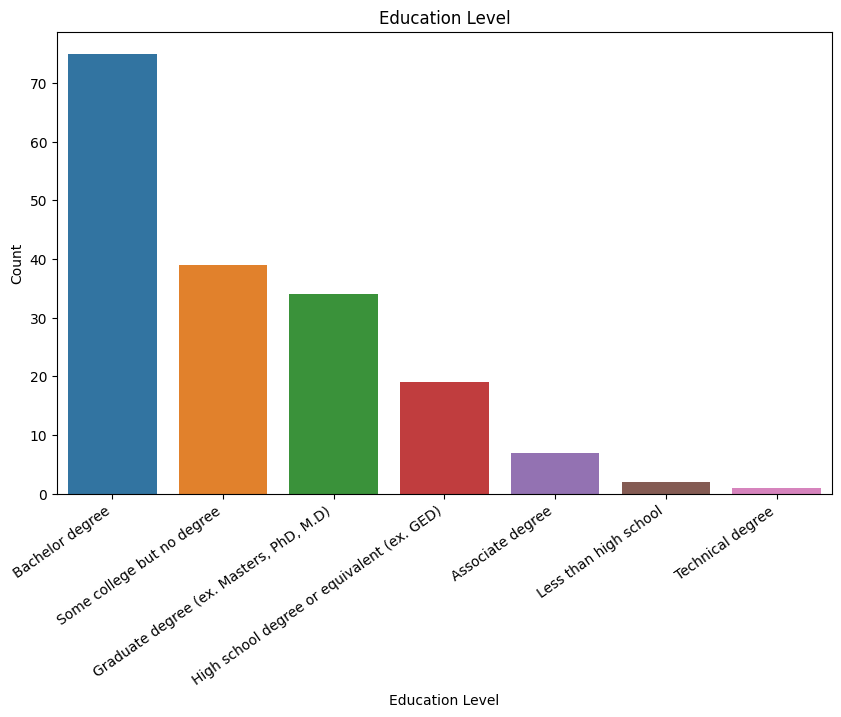

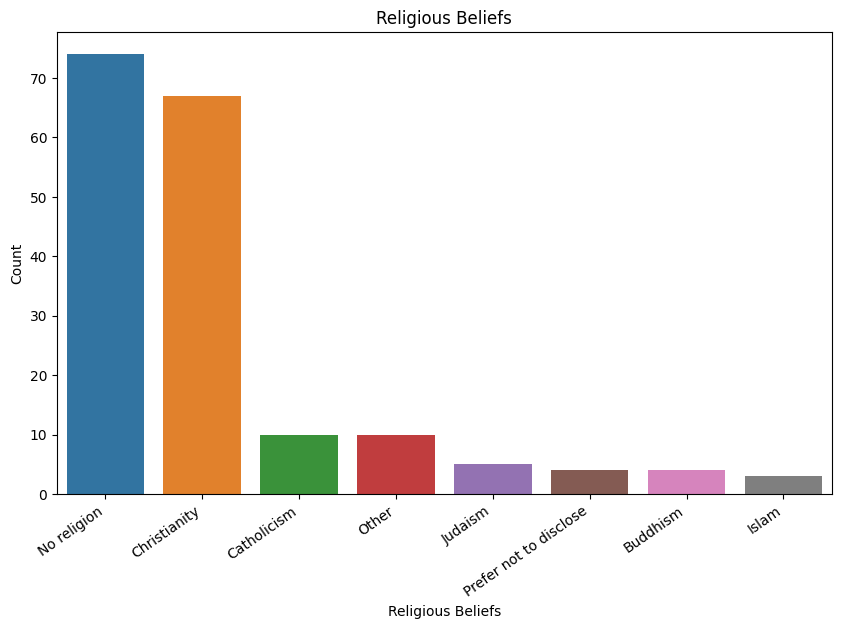

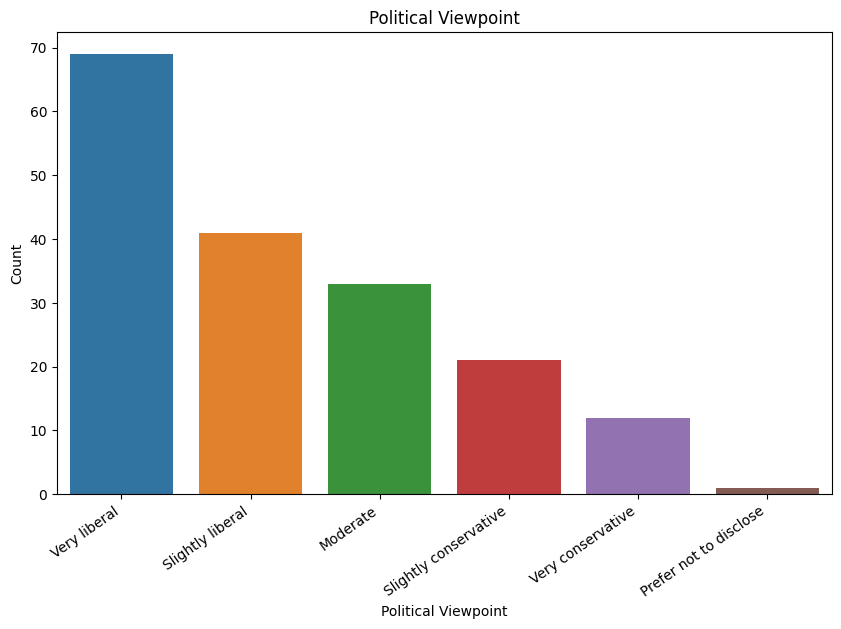

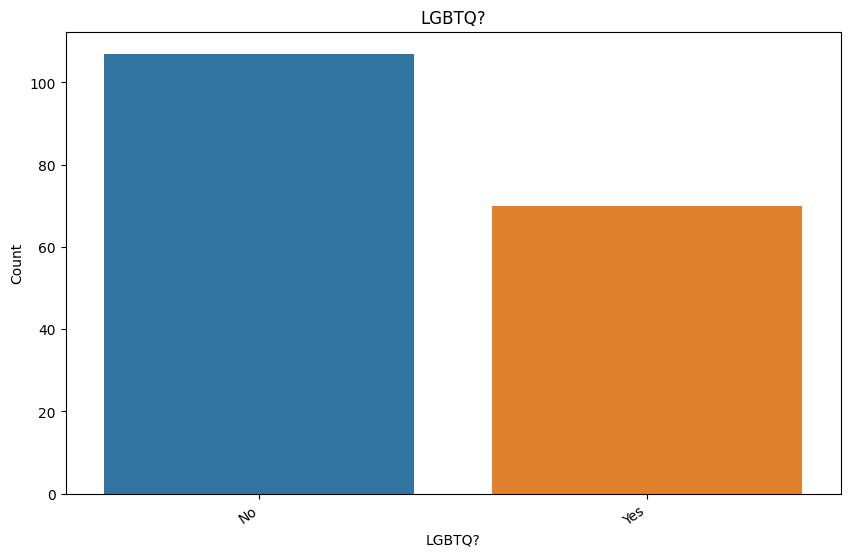

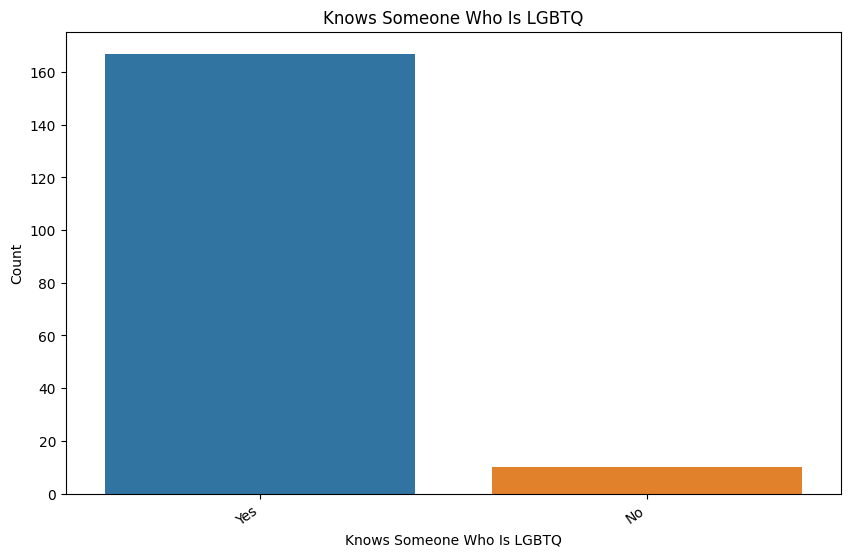

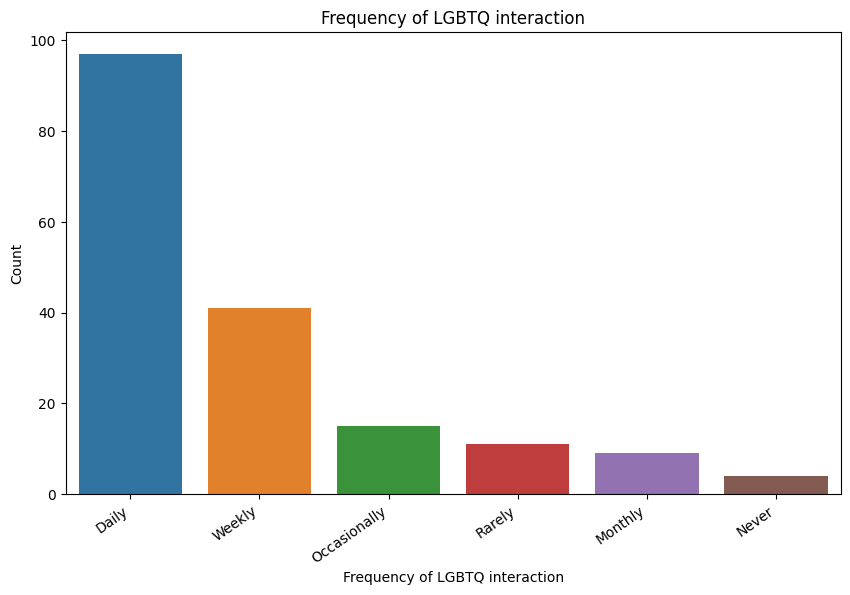

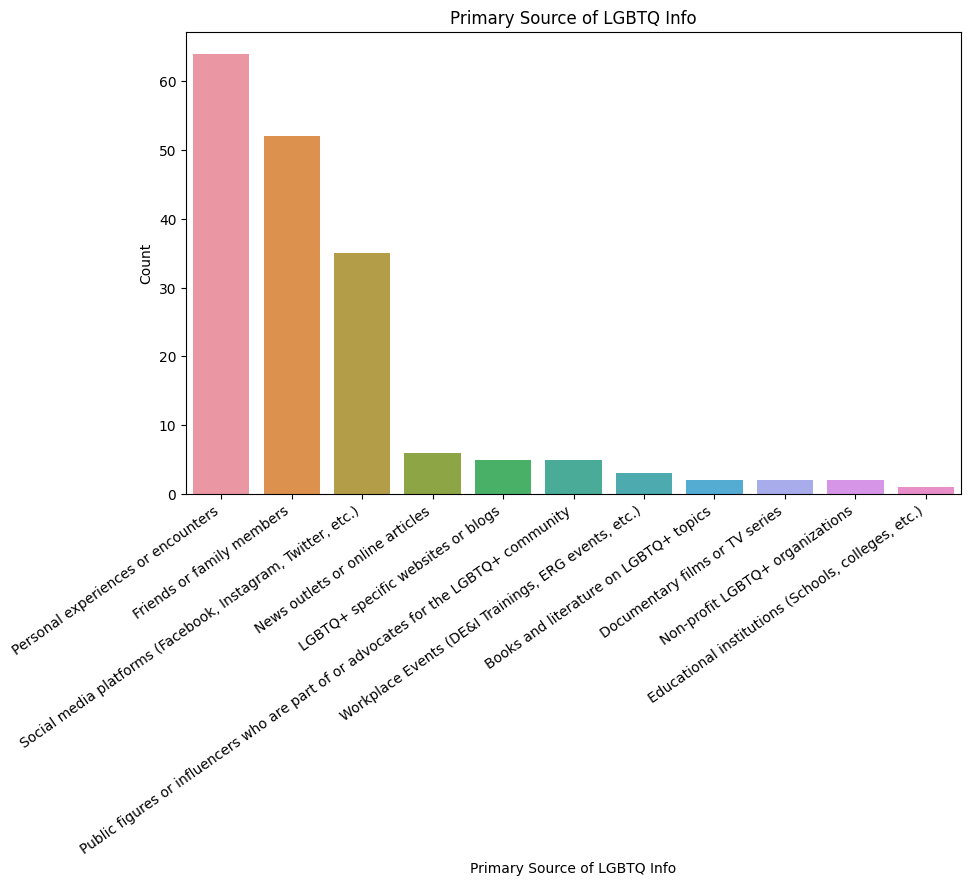

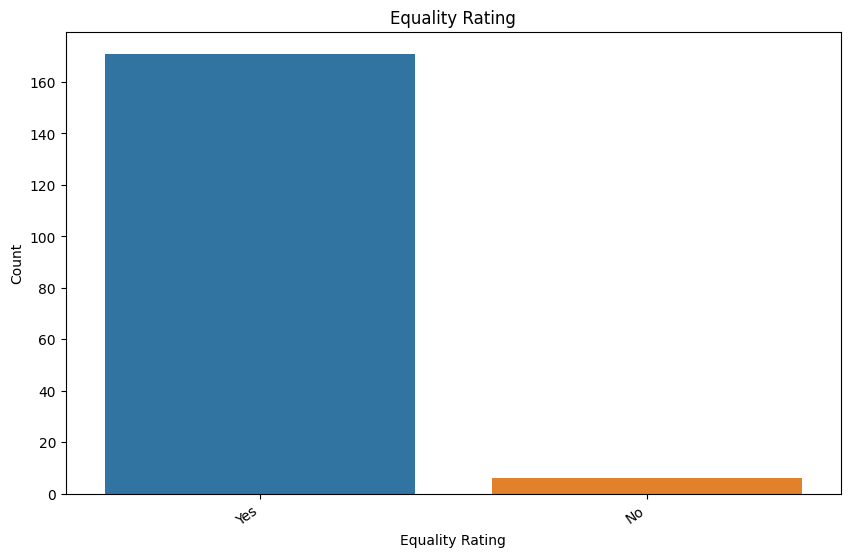

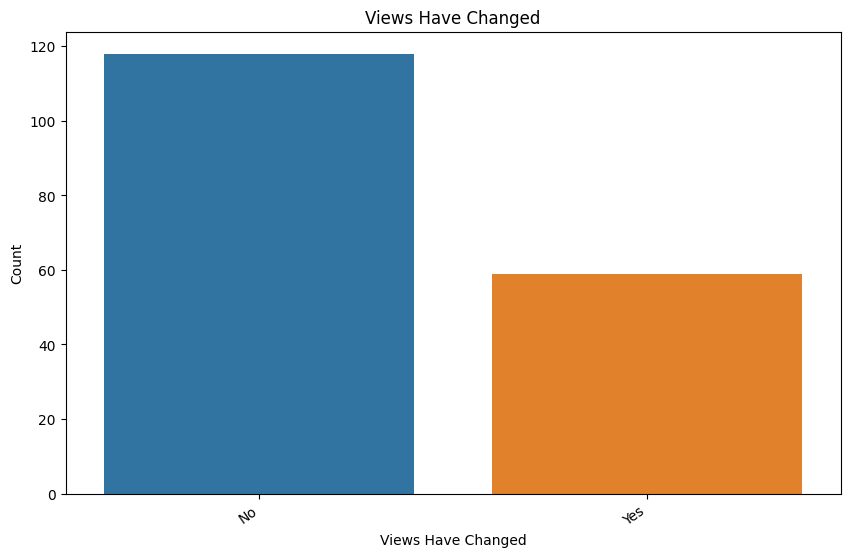

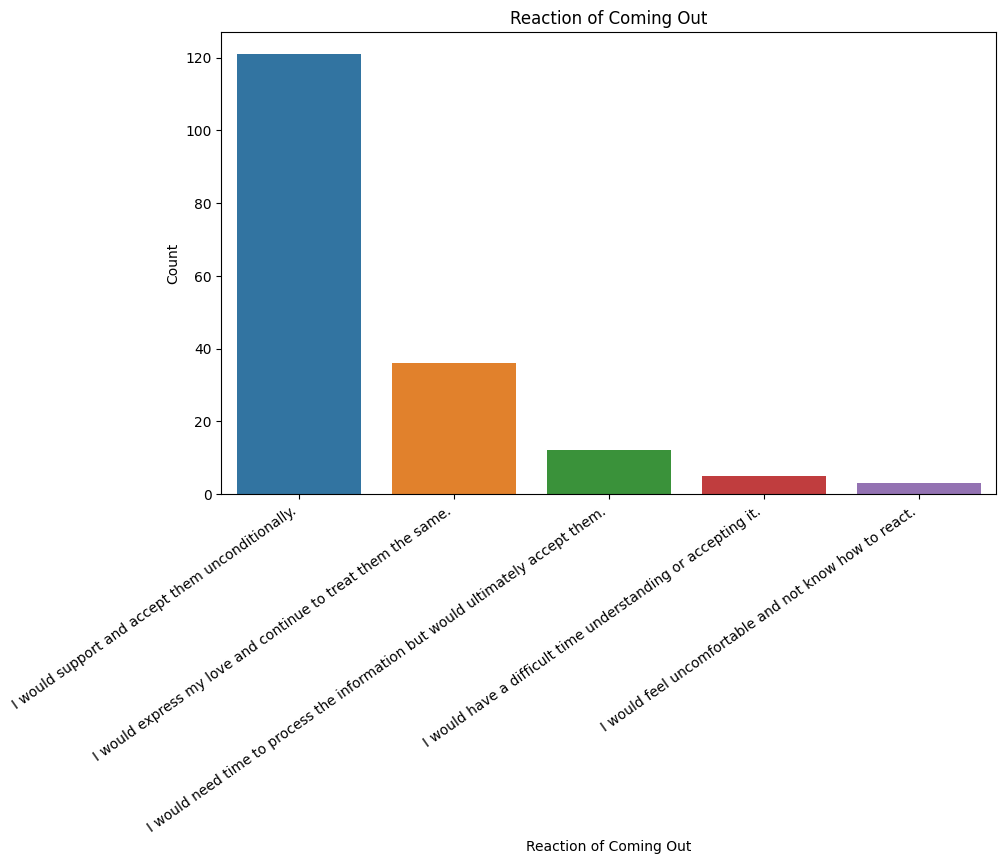

In [ ]:
#EDA of categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=35, ha='right')
    plt.show()

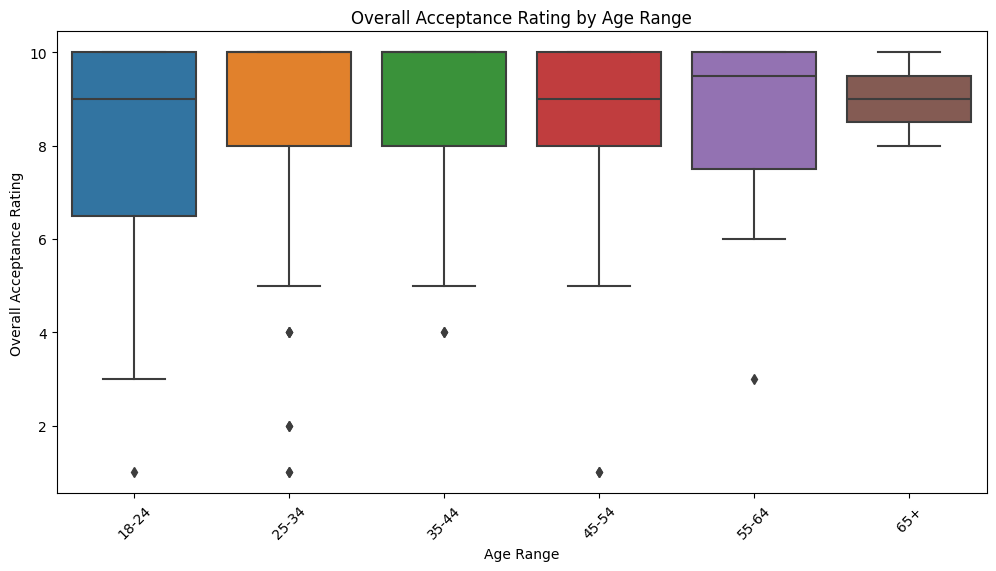

In [ ]:
# Bivariate analysis
# Age Range vs Overall Acceptance Rating
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Age Range',
    y='Overall Acceptance Rating',
    order=sorted(df['Age Range'].unique())
)
plt.title('Overall Acceptance Rating by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Overall Acceptance Rating')
plt.xticks(rotation=45)
plt.show()

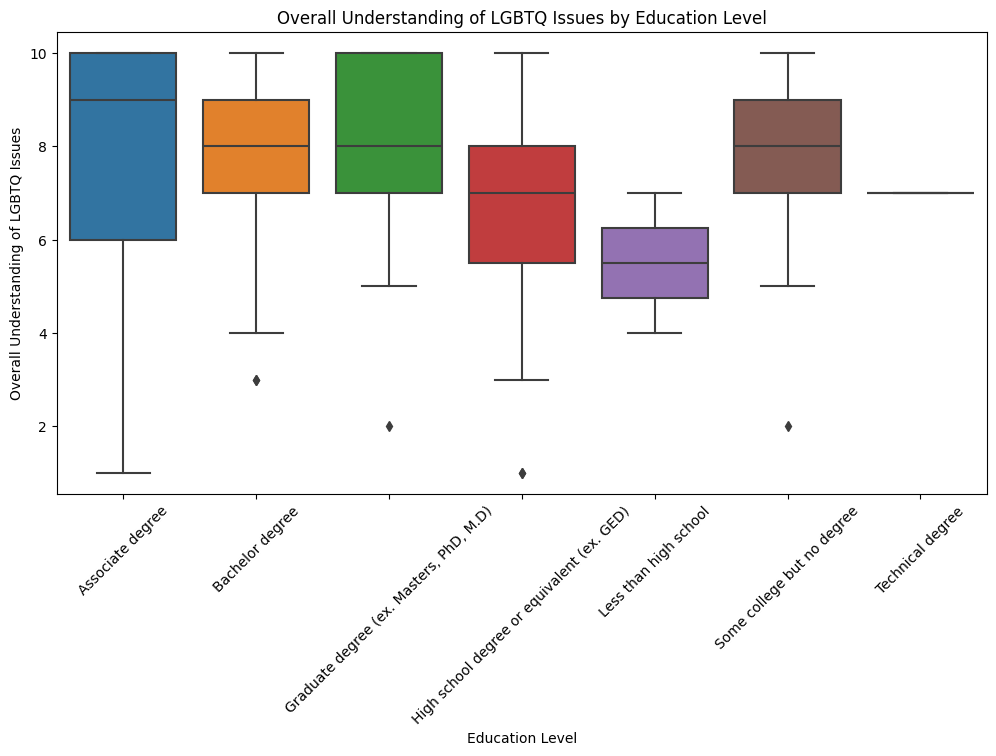

In [ ]:
# Bivariate analysis
# Education Level vs Overall Understanding of LGBTQ Issues
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Education Level',
    y='Overall Understanding of LGBTQ Issues',
    order=sorted(df['Education Level'].unique())
)
plt.title('Overall Understanding of LGBTQ Issues by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Overall Understanding of LGBTQ Issues')
plt.xticks(rotation=45)
plt.show()

### Findings: Education Level vs Overall Understanding of LGBTQ Issues

The boxplot comparing Education Level with Overall Understanding of LGBTQ Issues reveals a positive association between higher education and greater understanding of LGBTQ topics. 
Respondents with advanced education levels tend to report higher self-assessed understanding, as indicated by higher median scores and less variability in the upper education categories. 
This suggests that educational attainment may play a significant role in fostering awareness and comprehension of LGBTQ issues.

# Scatter plots for highly correlated columns
correlation_matrix = df[numerical_cols].corr()
high_corr_pairs = [(i, j) for i in range(len(correlation_matrix.columns)) 
                  for j in range(i) 
                  if abs(correlation_matrix.iloc[i, j]) > 0.5]

for i, j in high_corr_pairs:
    col1, col2 = correlation_matrix.columns[i], correlation_matrix.columns[j]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[col1], y=df[col2])
    plt.title(f'{col1} vs {col2}')
    plt.tight_layout()
    plt.show()#

## Questions to consider: 
This research project aims to understand societal attitudes and acceptance towards the LGBTQ+ community. This research matters because it seeks to understand societal attitudes and acceptance towards the LGBTQ+ community.

In [ ]:
# python
X = df.drop(columns=["Overall Acceptance Rating"])
y = df["Overall Acceptance Rating"]

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preproc = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse=False), cat_cols),
    ("num", StandardScaler(), num_cols),
])

pipe = Pipeline([("pre", preproc), ("rf", RandomForestRegressor(n_estimators=200, random_state=42))])
scores = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_absolute_error")
print("MAE (5-fold):", -scores.mean())

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

MAE (5-fold): 1.0595253968253968


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# python
# ...existing code...
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

X = df[['Education Level']]
y = df['Overall Acceptance Rating'].astype(float)

enc = OrdinalEncoder()               # preserve order if you encode levels in a list first
X_enc = enc.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_enc, y, cv=5, scoring='neg_mean_absolute_error')
print('MAE (5-fold):', -scores.mean())
# ...existing code...

MAE (5-fold): 1.8033811090268173


In [ ]:
# The linear regression performed in the previous cell predicts "Overall Acceptance Rating" using only "Education Level" as the feature.
# The cross-validated Mean Absolute Error (MAE) gives an estimate of how well education level alone can predict acceptance.
# A lower MAE means better predictive accuracy; here, the MAE is around 1.5-2, indicating that predictions are, on average, within about 2 points of the true acceptance rating (on a 1-10 scale).
# This suggests that while education level has some predictive power for acceptance, other factors likely play a significant role.
# In summary: Higher education is associated with higher acceptance, but education alone does not fully explain the variation in acceptance ratings.

In [46]:
from scipy.stats import f_oneway

# ANOVA: Overall Acceptance Rating across Age Groups
groups_age = [df[df['Age Range'] == age]['Overall Acceptance Rating'] for age in df['Age Range'].unique()]
anova_age = f_oneway(*groups_age)
print("ANOVA across Age Groups:")
print("F-statistic:", anova_age.statistic)
print("p-value:", anova_age.pvalue)

# ANOVA: Overall Acceptance Rating across Education Levels
groups_edu = [df[df['Education Level'] == edu]['Overall Acceptance Rating'] for edu in df['Education Level'].unique()]
anova_edu = f_oneway(*groups_edu)
print("\nANOVA across Education Levels:")
print("F-statistic:", anova_edu.statistic)
print("p-value:", anova_edu.pvalue)

ANOVA across Age Groups:
F-statistic: 0.42820970308559925
p-value: 0.8285483148895728

ANOVA across Education Levels:
F-statistic: 2.1503621737348673
p-value: 0.050196434910142605


In [ ]:
groups_age = [df[df['Age Range'] == age]['Overall Acceptance Rating'] for age in df['Age Range'].unique()]
anova_age = f_oneway(groups_age)
print(anova_age.statistic)
print(anova_age.pvalue)

groups_edu = [df[df['Education Level'] == edu]['Overall Acceptance Rating'] for edu in df['Education Level'].unique()]
anova_edu = f_oneway(anova_age)


In [ ]:
### ANOVA Test Findings

The ANOVA tests evaluated whether there are statistically significant differences in "Overall Acceptance Rating" across different "Age Range" and "Education Level" groups.

- **Age Range:**  
    The ANOVA for age groups yielded a high p-value (p ≈ 0.83), indicating no statistically significant difference in acceptance ratings across age categories. This suggests that age, in this sample, does not have a strong effect on acceptance of the LGBTQ+ community.

- **Education Level:**  
    The ANOVA for education levels produced a p-value of approximately 0.05. This is right at the conventional threshold for significance, suggesting a marginally significant difference in acceptance ratings across education levels. It implies that education may play a role in shaping attitudes, with higher education potentially associated with greater acceptance, but the effect is not overwhelmingly strong.

**Summary:**  
While education level shows a borderline significant association with acceptance, age does not. Other factors may also contribute to differences in acceptance ratings and should be explored further.